In [0]:
#Necessary libraries
import numpy as np
import pandas as pd
from google.colab import files
import sqlite3

In [0]:
#load datasets
#we orginized the dataset; removed unnecessary columns and rows which has less than 6.5 averagerating etc.
uploaded = files.upload()

Saving imdb.csv to imdb.csv


In [0]:
movies = pd.read_csv('imdb.csv')

In [0]:
movies.head()

,tconst,primarytitle,originaltitle,startyear,runtimeminutes,genres,averagerating,numvotes
0,tt0481580,Autism: The Musical,Autism: The Musical,2007,94,"Documentary,Music",7.9,642.0
1,tt0481587,Muskrat Lovely,Muskrat Lovely,2005,57,Documentary,7.6,19.0
2,tt0481589,Naked in Ashes,Naked in Ashes,2005,103,Documentary,7.9,43.0
3,tt0481595,Operation Spring,Operation Spring,2005,92,Documentary,7.8,54.0
4,tt0481603,The Prince of Chess,The Prince of Chess,2005,50,Documentary,7.7,59.0


In [0]:
movies.sort_values(by=['averagerating'], ascending=False)

,tconst,primarytitle,originaltitle,startyear,runtimeminutes,genres,averagerating,numvotes
6771,tt10315070,0010: The Sharks Make Contact - Part 2,0010: The Sharks Make Contact - Part 2,2019,115,"Animation,Comedy,Sci-Fi",10.0,10.0
38959,tt6735740,Love in Kilnerry,Love in Kilnerry,2019,100,Comedy,10.0,2874.0
42524,tt7525642,A Medicine for the Mind,A Medicine for the Mind,2019,15,"Comedy,Drama,Fantasy",10.0,145.0
7264,tt11248618,The Secret of Butterflies,The Secret of Butterflies,2019,84,"Adventure,Animation,Comedy",10.0,6.0
25422,tt2990342,Centro de Dia,Centro de Dia,2017,94,Documentary,10.0,6.0
...,...,...,...,...,...,...,...,...
11621,tt1599315,In Organic We Trust,In Organic We Trust,2012,82,Documentary,6.5,96.0
35231,tt4844148,Mia and the White Lion,Mia et le lion blanc,2018,98,"Adventure,Drama,Family",6.5,2541.0
31392,tt3896738,Hounds of Love,Hounds of Love,2016,108,"Crime,Drama,Thriller",6.5,8781.0
40284,tt6193992,Neko Ninja,Nekonin,2017,95,"Comedy,Drama",6.5,31.0


**As you can see even if number of vote is poor it may cause that movie seem like it's successfull.**
**So ratings and number of votes are both important for recommendation.**

In [0]:
movies.sort_values(by=['numvotes'], ascending=False).head()

,tconst,primarytitle,originaltitle,startyear,runtimeminutes,genres,averagerating,numvotes
3761,tt0468569,The Dark Knight,The Dark Knight,2008,152,"Action,Crime,Drama",9.0,2139554.0
10505,tt1375666,Inception,Inception,2010,148,"Action,Adventure,Sci-Fi",8.8,1897466.0
10172,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164,"Action,Thriller",8.4,1424430.0
1287,tt0816692,Interstellar,Interstellar,2014,169,"Adventure,Drama,Sci-Fi",8.6,1352327.0
16746,tt1853728,Django Unchained,Django Unchained,2012,165,"Drama,Western",8.4,1252402.0


In [0]:
genres = np.array(['Adventure','Sci-Fi','Animation','Comedy','Mystery','Thriller','Drama','Romance','Horror'])
genres

array(['Adventure', 'Sci-Fi', 'Animation', 'Comedy', 'Mystery',
       'Thriller', 'Drama', 'Romance', 'Horror'], dtype='<U9')

In [0]:
import matplotlib.pyplot as plt 
import seaborn as sns 
  
sns.set_style('white') 
%matplotlib inline 


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


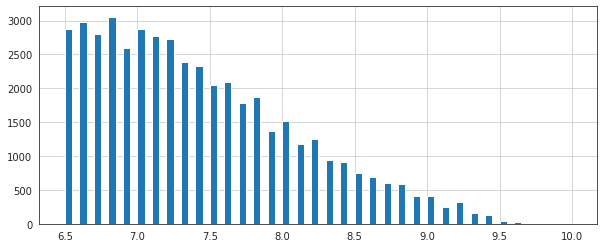

In [0]:
# plot graph of 'num of ratings column' 
plt.figure(figsize =(10, 4)) 
  
movies['averagerating'].hist(bins = 70)

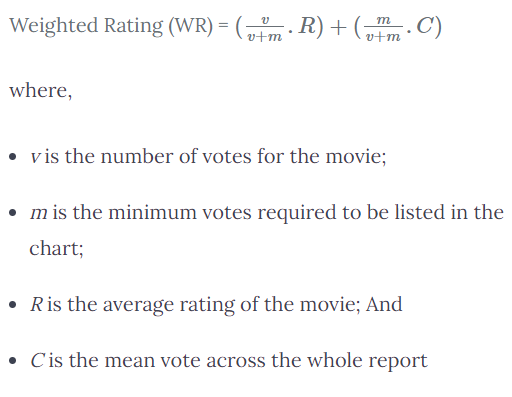

In [0]:
C = movies['averagerating'].mean()
C

7.411957475026195

In [0]:
# Calculate the minimum number of votes required to be in the chart, m
m = movies['numvotes'].quantile(0.90)
m

2242.0

In [0]:
# Filter out all qualified movies into a new DataFrame
q_movies = movies.copy().loc[movies['numvotes'] >= m]
q_movies.shape


(4676, 8)

In [0]:
# Function that computes the weighted rating of each movie
def weighted_rating(data, m=m, C=C):
    v = data['numvotes']
    R = data['averagerating']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [0]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

In [0]:
#sort movies based on score calculated above
q_movies = q_movies.sort_values('score', ascending=False)

In [0]:
q_movies.head(10)

,tconst,primarytitle,originaltitle,startyear,runtimeminutes,genres,averagerating,numvotes,score
21955,tt2592910,CM101MMXI Fundamentals,CM101MMXI Fundamentals,2013,139,"Comedy,Documentary",9.2,42164.0,9.109724
18293,tt2170667,Wheels,Wheels,2014,115,Drama,9.3,17442.0,9.084953
37301,tt5354160,Aynabaji,Aynabaji,2016,147,"Crime,Mystery,Thriller",9.2,18807.0,9.009550
3761,tt0468569,The Dark Knight,The Dark Knight,2008,152,"Action,Crime,Drama",9.0,2139554.0,8.998338
35879,tt5813916,The Mountain II,Dag II,2016,135,"Action,Drama,War",9.0,101919.0,8.965818
43123,tt7738784,Peranbu,Peranbu,2018,147,Drama,9.2,10670.0,8.889530
38959,tt6735740,Love in Kilnerry,Love in Kilnerry,2019,100,Comedy,10.0,2874.0,8.865834
10505,tt1375666,Inception,Inception,2010,148,"Action,Adventure,Sci-Fi",8.8,1897466.0,8.798362
34018,tt5275892,O.J.: Made in America,O.J.: Made in America,2016,467,"Biography,Crime,Documentary",8.9,15528.0,8.712257
41878,tt7286456,Joker,Joker,2019,122,"Crime,Drama,Thriller",8.7,502021.0,8.694273


In [0]:
q_movies.tail()

,tconst,primarytitle,originaltitle,startyear,runtimeminutes,genres,averagerating,numvotes,score
12030,tt1632708,Friends with Benefits,Friends with Benefits,2011,109,"Comedy,Romance",6.5,323246.0,6.506282
2936,tt0438488,Terminator Salvation,Terminator Salvation,2009,115,"Action,Sci-Fi",6.5,329291.0,6.506167
2515,tt0407304,War of the Worlds,War of the Worlds,2005,116,"Adventure,Sci-Fi,Thriller",6.5,395525.0,6.505140
2267,tt0356910,Mr. & Mrs. Smith,Mr. & Mrs. Smith,2005,120,"Action,Comedy,Crime",6.5,426798.0,6.504766
25358,tt2975590,Batman v Superman: Dawn of Justice,Batman v Superman: Dawn of Justice,2016,151,"Action,Adventure,Sci-Fi",6.5,591074.0,6.503446


Score işlemini tamamladıktan sonra bir sonraki aşama olarak gerçekleştirdiğimiz anket sonuçlarındaki kişilerin farklı ruh halindeyken yapacağı film tercihi sonuçlarını inceledik.
Yüksek yüzde ile seçilen film türlerini tavsiye oluştururken göz önünde bulunduracağız.

Aşağıda grafiklerin son halleri yer almaktadır.

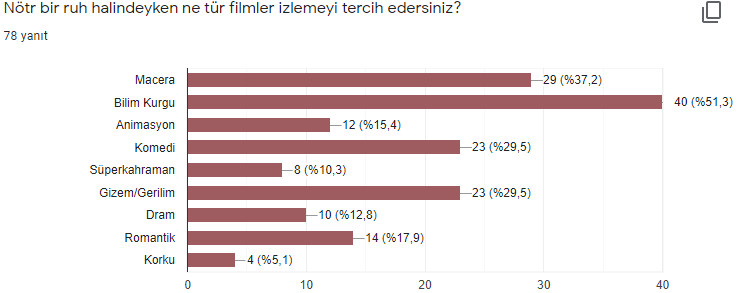

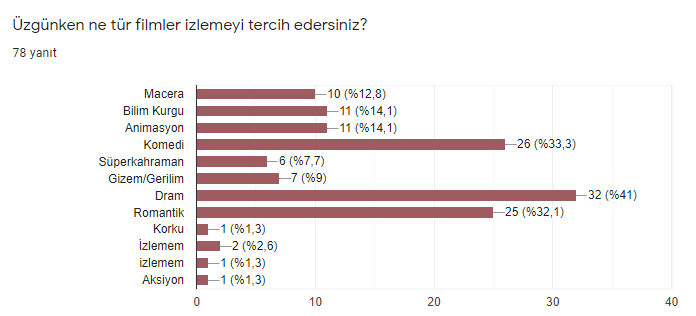

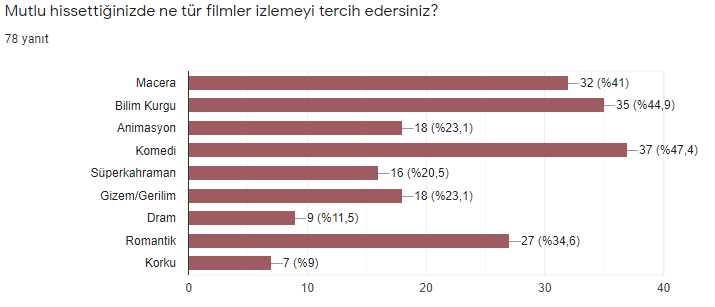

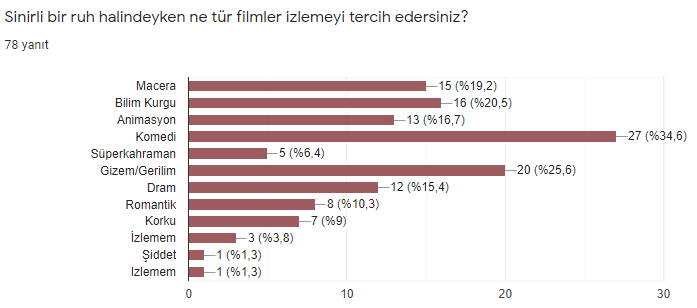

Nötr, üzgün, mutlu ve sinirli için dört ayrı dictionary yapısı oluşturup **"genre":yüzde** şeklinde doldurma işlemini gerçekleştirdik. Grafiklere göre %20'den fazla yüzdesi olan genre'ları dikkate aldık. 

In [0]:
notr_mood_genres = {
    'Adventure' : 0.37,
    'Sci-Fi' : 0.51,
    'Comedy':0.29,
    'Mystery':0.29,
    'Thriller':0.29
}

In [0]:
sad_mood_genres = {
    'Comedy':0.33,
    'Drama':0.41,
    'Romance':0.32
}

In [0]:
happy_mood_genres = {
    'Adventure' :0.41,
     'Sci-Fi' :0.44,
     'Animation':0.23,
     'Comedy':0.47,
     'Mystery':0.23,
     'Thriller':0.23,
     'Romance':0.34
}

In [0]:
angry_mood_genres = {
    'Sci-Fi' : 0.20,
    'Comedy':0.34,
    'Mystery':0.25,
    'Thriller':0.25,
}

In [0]:
mood = "" #this variable will be fill from emotion rec. system

Bir döngü içerinde çalışacak duyguya yönelik tavsiye işleminin taslak yapısı aşağıdaki şekildedir. Her mod için ayrı fonksiyon oluşturulup eylem kısımlarında çağırılacaktır.

In [0]:
if mood == "Sad":
  print("Our recommendation for you is:")
elif mood == "Happy":
  print("Our recommendation for you is:")
elif mood == "Angry":
  print("Our recommendation for you is:")
else: #neutral
  print("Our recommendation for you is:")

Our recommendation for you is:
